In [1]:
import pandas as pd
import numpy as np
import xlrd
from matplotlib import pyplot as plt

In [2]:
def plot_multi_dataframe(df, startIndex, endIndex):
    plt.figure(figsize=(25,20))
    column_nr = df.shape[1]
    for i in range(0, column_nr):
        plt.subplot(column_nr, 1, i+1)
        sub_df = df[[df.columns[i]]]
        plt.plot(sub_df)
        plt.title(df.columns[i], y=0.5, loc='right')    
    plt.show()

def plot_train_test_dataframe(train, test):
    plt.figure(figsize=(25,20))
    column_nr = train.shape[1]
    for i in range(0, column_nr):
        plt.subplot(column_nr, 1, i+1)
        sub_train = train[[train.columns[i]]]
        sub_test = test[[test.columns[i]]]
        plt.plot(sub_train)
        plt.plot(sub_test)
        plt.title(train.columns[i], y=0.5, loc='right')    
    plt.show()

In [3]:
#read the data
df = pd.read_excel("Data Inputs.xlsx", skiprows=1)
df.head()

,SeriesDate,P1,P2,P3,P4,P5,US
0,2012-12-28,940,3463,8036,597,2306,15341
1,2013-01-04,1068,3471,7916,611,2190,15257
2,2013-01-11,1102,3451,7647,595,2305,15101
3,2013-01-18,1035,3360,7078,568,2165,14206
4,2013-01-25,999,3342,7361,554,2225,14481


In [4]:
data = df.drop(['US', 'SeriesDate'], axis=1)
data.index = df.SeriesDate
data.head()

,P1,P2,P3,P4,P5
SeriesDate,,,,,
2012-12-28,940,3463,8036,597,2306
2013-01-04,1068,3471,7916,611,2190
2013-01-11,1102,3451,7647,595,2305
2013-01-18,1035,3360,7078,568,2165
2013-01-25,999,3342,7361,554,2225


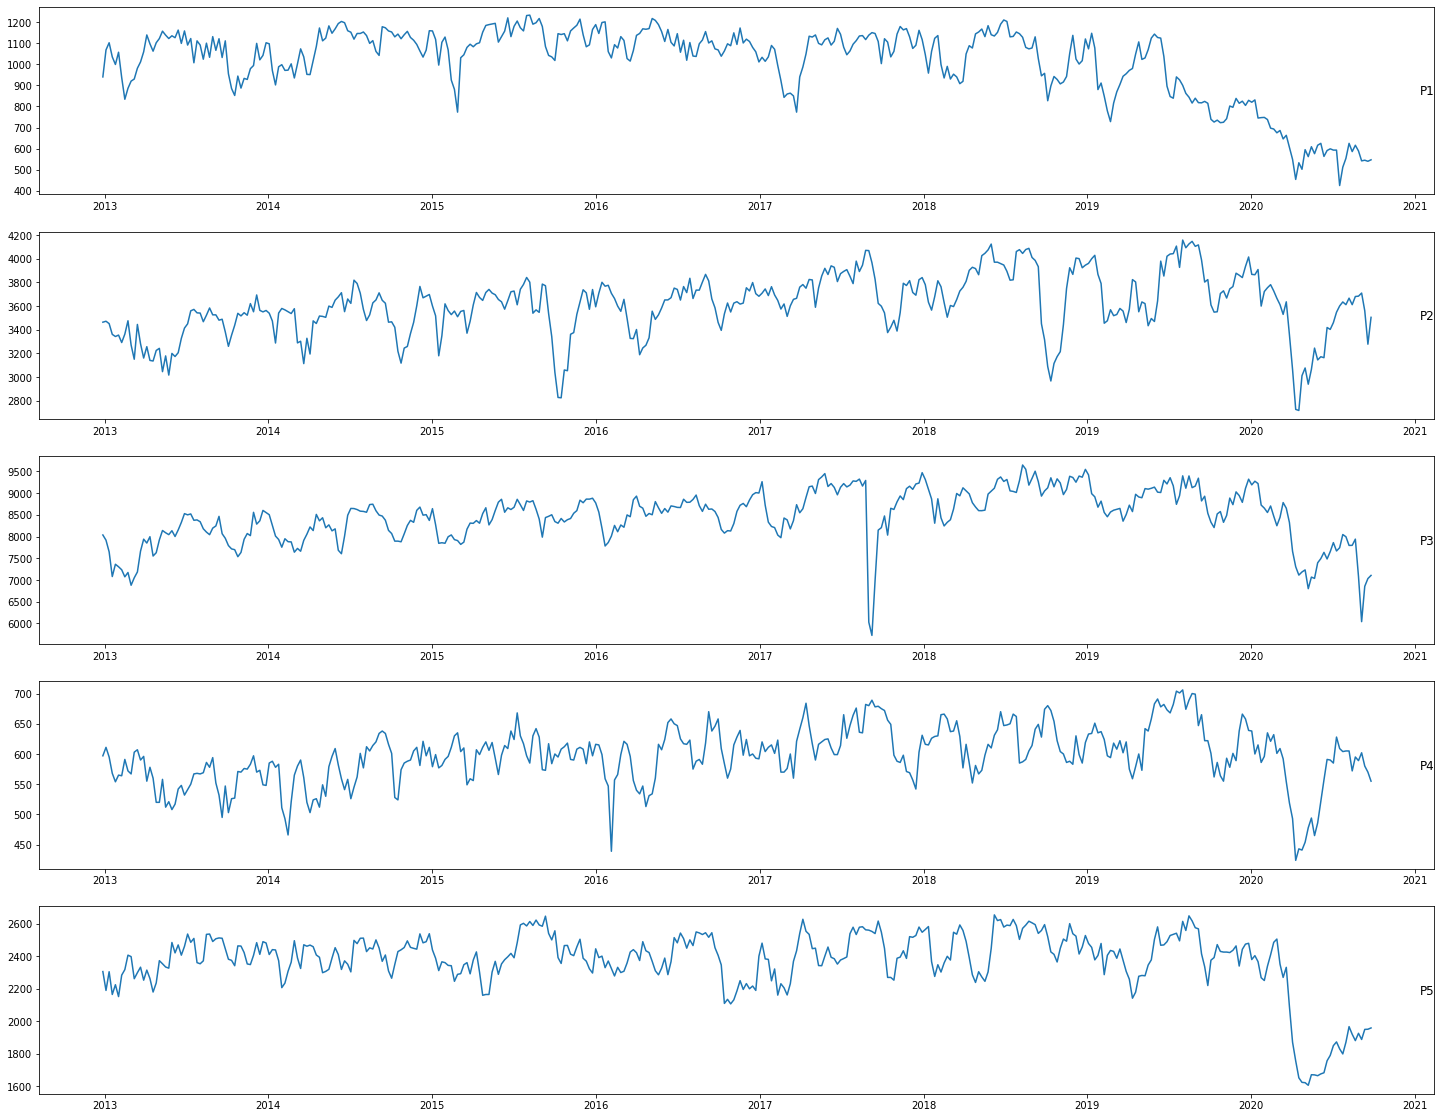

In [5]:
plot_multi_dataframe(data, 0, len(data))

In [9]:
n_forecast_days = 30
n_lag_days = 30

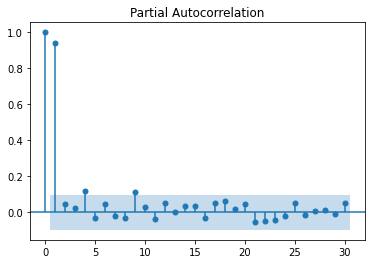

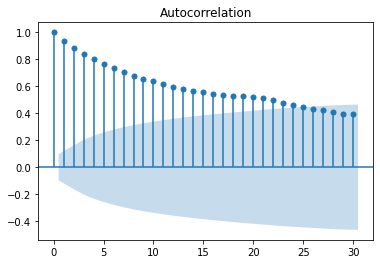

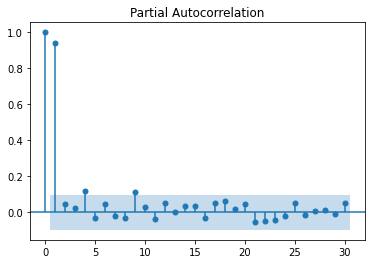

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['P1'], lags=30)
plot_pacf(data['P1'], lags=30)

In [21]:
temps = pd.DataFrame(data.values, index = data.index)
shifted = temps.shift(1)
window = shifted.rolling(window=7)
print(window)
means = window.mean()
print(means.head(15))
means.columns = ['P1 mean(t-2,t-1)', 'P2 mean(t-2,t-1)', 'P3 mean(t-2,t-1)', 'P4 mean(t-2,t-1)', 'P5 mean(t-2,t-1)']
data1 = data.copy()
for i in range(1, 15):
    for col in data.columns:
        data1[col + " lag_" + str(i)] = data[col].shift(i)
dataframe = pd.concat([data1, means], axis=1)
dataframe = dataframe.dropna()
print(dataframe)
print(data.columns)

Rolling [window=7,center=False,axis=0]
                      0            1            2           3            4
SeriesDate                                                                
2012-12-28          NaN          NaN          NaN         NaN          NaN
2013-01-04          NaN          NaN          NaN         NaN          NaN
2013-01-11          NaN          NaN          NaN         NaN          NaN
2013-01-18          NaN          NaN          NaN         NaN          NaN
2013-01-25          NaN          NaN          NaN         NaN          NaN
2013-02-01          NaN          NaN          NaN         NaN          NaN
2013-02-08          NaN          NaN          NaN         NaN          NaN
2013-02-15  1019.714286  3390.285714  7510.714286  579.142857  2232.428571
2013-02-22  1004.571429  3375.857143  7372.857143  578.285714  2234.142857
2013-03-01   978.571429  3376.428571  7266.428571  572.714286  2265.142857
2013-03-08   952.571429  3350.571429  7156.428571  568.714286

In [95]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))
def rmse(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))
def mae():
    return np.sqrt(mean_absolute_error(ytrue, ypred))

In [96]:
def plot_results(real, predicted):
    # plot
    for i in range(real.shape[1]):
        rmse = np.sqrt(mean_squared_error(real[:, i], predictions[:, i]))
        mae = mean_absolute_error(real[:, i], predictions[:, i])
        rmse = ' RMSE: %.3f' % rmse
        mae = ' MAE: %.3f' % mae
        plt.figure(figsize=(25,10))
        plt.plot(real[:, i], label='real')
        plt.plot(predicted[:, i], color='red', label='prediction')
        plt.legend(loc="upper right")
        plt.title(train.columns[i] + rmse + mae)
        plt.show()

[[ 686 3611 8442  609 2352]
 [ 646 3529 8783  592 2270]
 [ 663 3635 8653  554 2332]
 [ 607 3357 8323  519 2091]
 [ 549 3063 7659  493 1871]
 [ 454 2726 7304  424 1756]
 [ 533 2717 7111  443 1652]
 [ 502 3011 7183  441 1624]
 [ 595 3076 7231  454 1622]
 [ 562 2939 6798  478 1606]
 [ 609 3064 7065  494 1671]
 [ 576 3244 7035  465 1670]
 [ 616 3144 7395  486 1665]
 [ 625 3171 7491  522 1676]
 [ 563 3163 7635  557 1683]
 [ 591 3418 7483  591 1757]
 [ 599 3402 7652  590 1790]
 [ 593 3459 7860  585 1850]
 [ 593 3547 7667  628 1873]
 [ 425 3600 7742  609 1830]
 [ 512 3634 8046  604 1799]
 [ 554 3611 7995  605 1871]
 [ 625 3666 7795  605 1967]
 [ 586 3611 7797  572 1920]
 [ 616 3680 7940  595 1881]
 [ 589 3683 7081  589 1926]
 [ 542 3709 6038  602 1888]
 [ 545 3559 6853  580 1950]
 [ 540 3277 7031  570 1951]
 [ 547 3504 7104  555 1959]]
[[ 819.401 3630.411 8454.6    594.492 2419.237]
 [ 779.451 3632.626 8483.492  597.705 2405.233]
 [ 882.292 3723.762 8705.741  609.755 2378.845]
 [ 825.844 3733

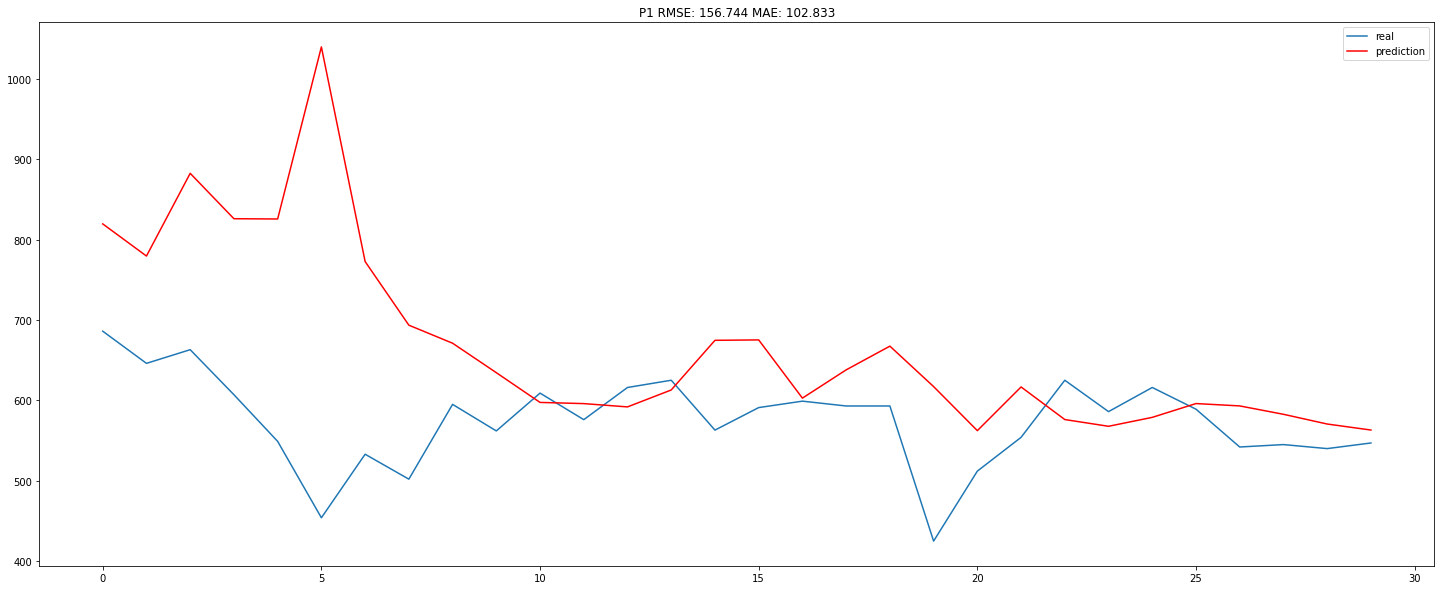

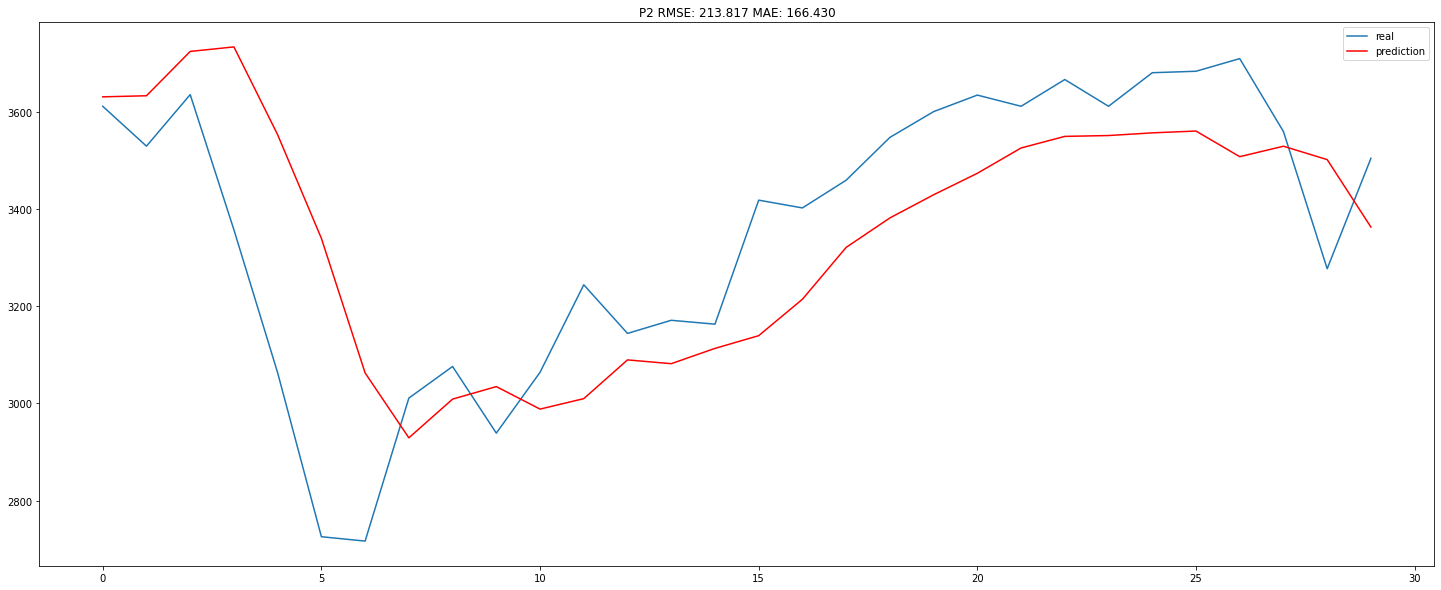

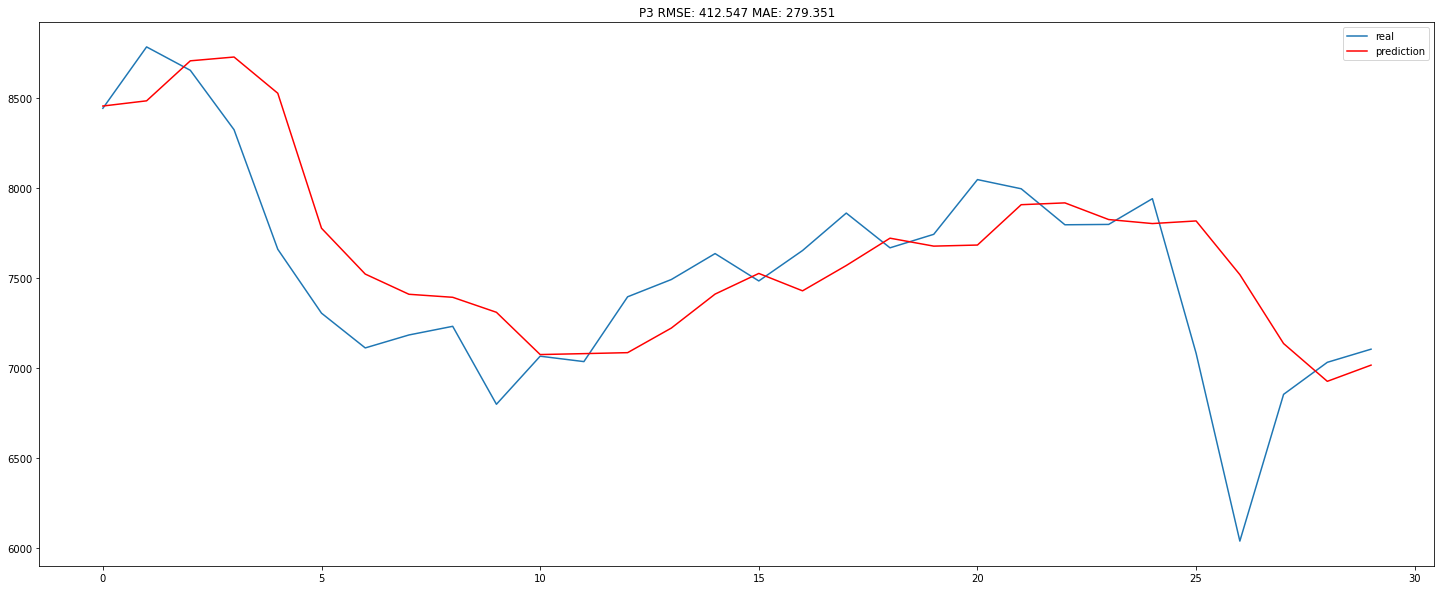

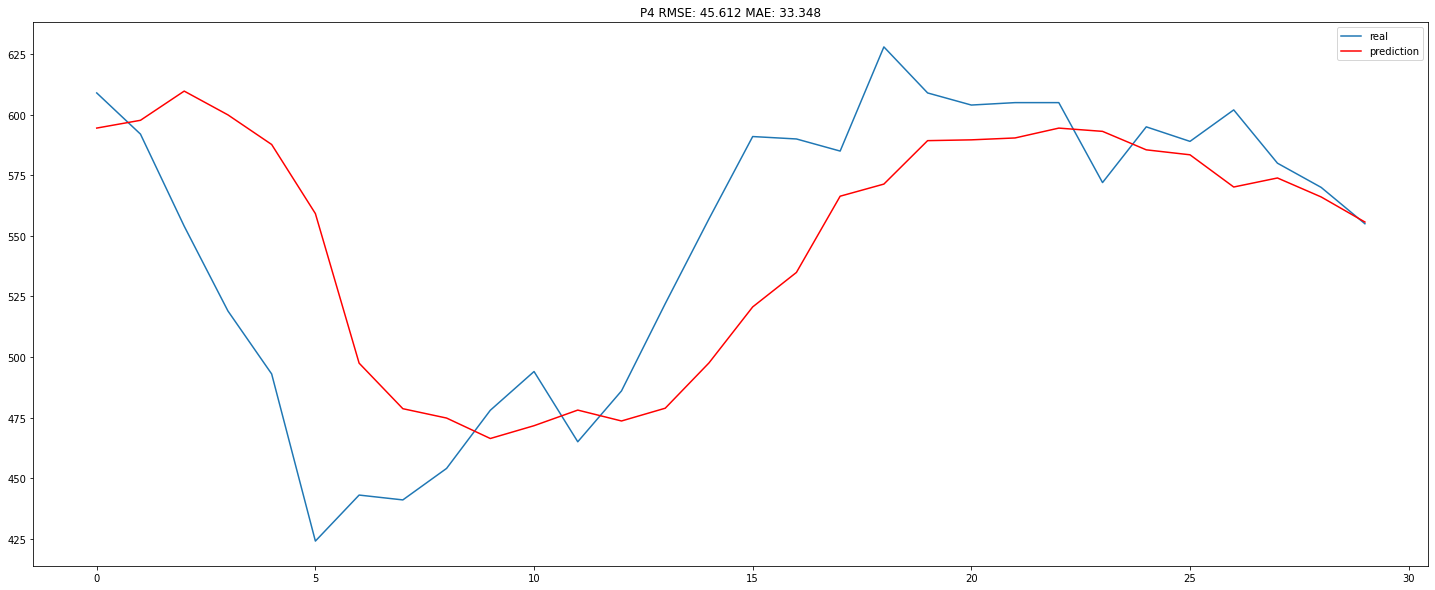

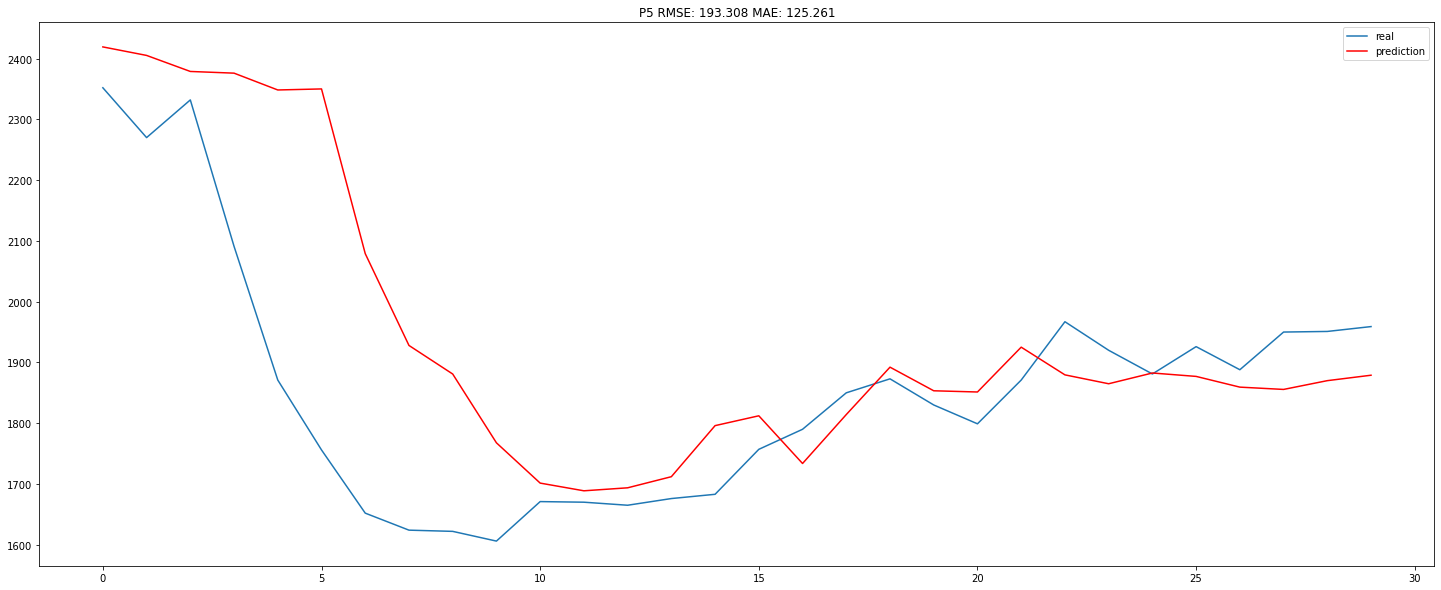

In [105]:
n_forecast_days = 30
from sklearn.ensemble import RandomForestRegressor

predictions = list()
y_label = ['P1', 'P2','P3', 'P4', 'P5']
test_valid = dataframe[len(dataframe)-n_forecast_days:]
y_actual = test_valid[y_label].values

# for week in range(30, 0, -1):
for time in range(n_forecast_days):
    train_end_idx = len(dataframe)-n_forecast_days + time
    train = dataframe[:train_end_idx]
    test = dataframe[train_end_idx:train_end_idx+1]
    xtr, xts = train.drop(y_label, axis=1), test.drop(y_label, axis=1)
    ytr, yts = train[y_label].values, test[y_label].values
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)    
    mdl.fit(xtr, ytr)
    yhat = mdl.predict(xts)[0]
    predictions.append(yhat.tolist())

predictions = np.asarray(predictions)
print(y_actual)
print(predictions)

plot_results(y_actual, predictions)